In [4]:
import pandas as pd
from glob import glob

raw_data = '/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/'
files = sorted(glob(raw_data + '*.csv'))
files

['/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/1000_tv_ratings_2021_Mar_01_1141.csv',
 '/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/1000_tv_ratings_2021_Mar_01_1206.csv',
 '/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/1000_tv_ratings_2021_Mar_01_1249.csv',
 '/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/1000_tv_ratings_2021_Mar_01_1315.csv',
 '/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/1001_tv_ratings_2021_Mar_12_1032.csv',
 '/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/1001_tv_ratings_2021_Mar_12_1156.csv',
 '/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/1002_tv_ratings_2021_Mar_15_1003.csv',
 '/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/1002_tv_ratings_2021_Mar_15_1031.csv',
 '/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/1002_tv_ratings_2021_Mar_15_1110.csv',
 '/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/1002_tv_ratings_2021_Mar_15_1135.csv',
 '/Users/catcamacho/Box/CCP/UGTV_study/DATA/tv_task/1003_tv_ratings_2021_Mar_22_1038.csv',

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

kjpos = []
kjneg = []
mlppos = []
mlpneg = []

for file in files:
    df = pd.read_csv(file,index_col=None,skiprows=[1,2,3,4,5],header=0,
                     usecols=['rating','participant','episode','rating_amplitude','rating_time'])
    df = df.iloc[:-2,:]
    df.index = pd.to_datetime(df['rating_time'],unit='s')
    subjid = df['participant'][0].astype(int)
    episode = df['episode'][0]
    rate = df['rating'][0]
    df = df.drop(['participant','episode','rating'],axis=1)
    df = df.resample('100ms').mean().round(1)
    #df.index = pd.to_datetime(df['rating_time'], unit='s').dt.strftime('%M:%S.%f')
    #df.index.name='time'
    df=df.drop(['rating_time'], axis=1)
    df.columns=[str(subjid)]
    if episode == 'kj' and rate == 'Positive':
        kjpos.append(df)
    elif episode == 'kj' and rate == 'Negative':
        kjneg.append(df)
    elif episode == 'mlp' and rate == 'Positive':
        mlppos.append(df)
    elif episode == 'mlp' and rate == 'Negative':
        mlpneg.append(df)
        
kjpos = pd.concat(kjpos, axis=1)
kjneg = pd.concat(kjneg, axis=1)
mlppos = pd.concat(mlppos, axis=1)
mlpneg = pd.concat(mlpneg, axis=1)

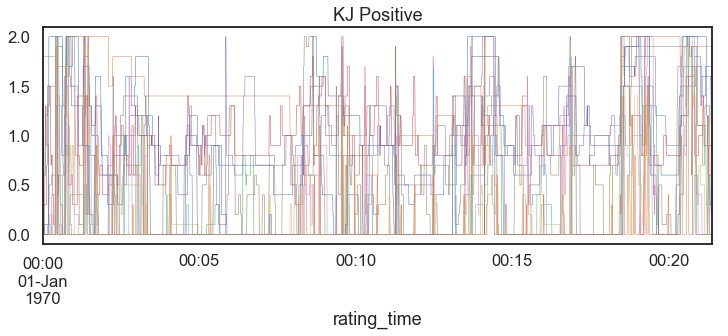

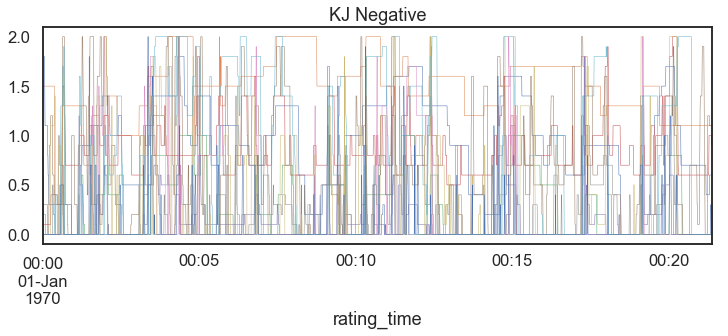

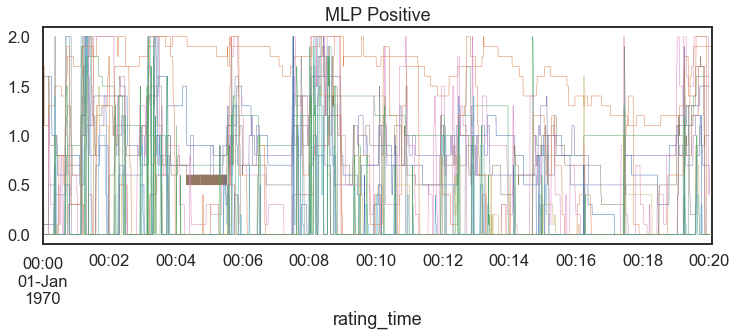

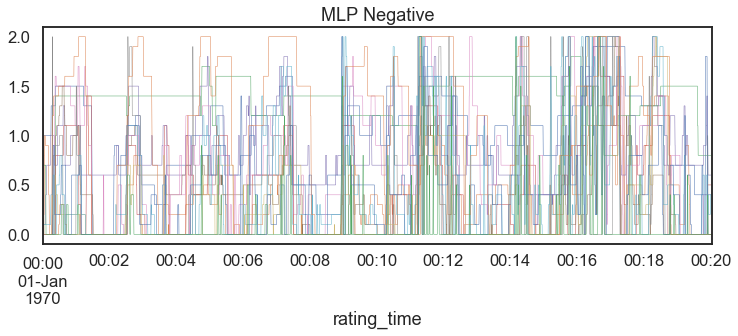

In [14]:
kjpos.plot(figsize=(12,4), linewidth=0.5,legend=None)
plt.title('KJ Positive')
plt.show()
plt.close()

kjneg.plot(figsize=(12,4), linewidth=0.5, legend=None)
plt.title('KJ Negative')
plt.show()
plt.close()

mlppos.plot(figsize=(12,4), linewidth=0.5, legend=None)
plt.title('MLP Positive')
plt.show()
plt.close()

mlpneg.plot(figsize=(12,4), linewidth=0.5, legend=None)
plt.title('MLP Negative')
plt.show()
plt.close()

In [23]:
from pandas import DataFrame
summary_stats = DataFrame()
summary_stats['MLPpos_mean'] = mlppos.mean(axis=0)
summary_stats['MLPneg_mean'] = mlpneg.mean(axis=0)
summary_stats['AHKJpos_mean'] = kjpos.mean(axis=0)
summary_stats['AHKJneg_mean'] = kjneg.mean(axis=0)
summary_stats['MLPpos_stdev'] = mlppos.std(axis=0)
summary_stats['MLPneg_stdev'] = mlpneg.std(axis=0)
summary_stats['AHKJpos_stdev'] = kjpos.std(axis=0)
summary_stats['AHKJneg_stdev'] = kjneg.std(axis=0)
summary_stats['MLPpos_range'] = mlppos.max(axis=0) - mlppos.min(axis=0)
summary_stats['MLPneg_range'] = mlpneg.max(axis=0) - mlpneg.min(axis=0)
summary_stats['AHKJpos_range'] = kjpos.max(axis=0) - kjpos.min(axis=0)
summary_stats['AHKJneg_range'] = kjneg.max(axis=0) - kjneg.min(axis=0)
summary_stats.to_csv('sample_summary.csv')

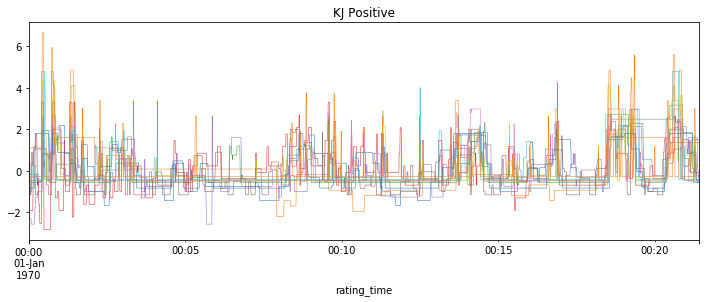

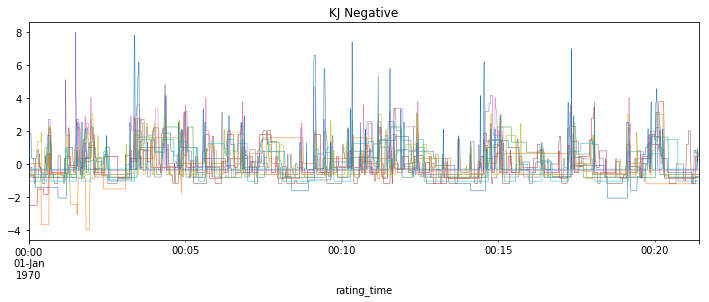

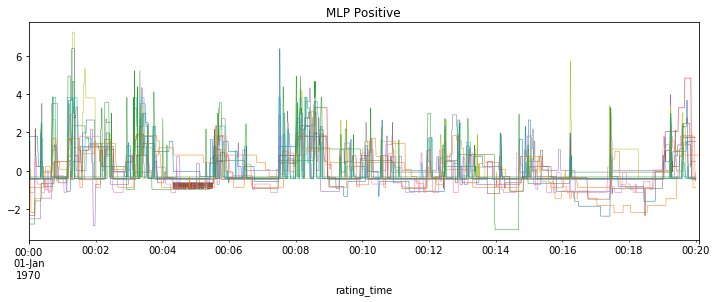

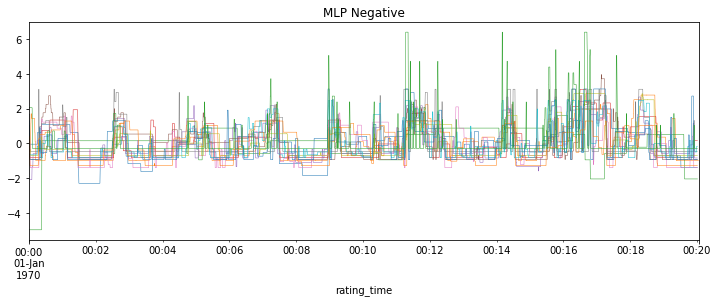

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

kjpos.loc[:,:]=ss.fit_transform(kjpos)
kjpos.plot(figsize=(12,4), linewidth=0.5, legend=None)
plt.title('KJ Positive')
plt.show()
plt.close()
kjneg.loc[:,:]=ss.fit_transform(kjneg)
kjneg.plot(figsize=(12,4), linewidth=0.5, legend=None)
plt.title('KJ Negative')
plt.show()
plt.close()
mlppos.loc[:,:]=ss.fit_transform(mlppos)
mlppos.plot(figsize=(12,4), linewidth=0.5, legend=None)
plt.title('MLP Positive')
plt.show()
plt.close()
mlpneg.loc[:,:]=ss.fit_transform(mlpneg)
mlpneg.plot(figsize=(12,4), linewidth=0.5, legend=None)
plt.title('MLP Negative')
plt.show()
plt.close()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


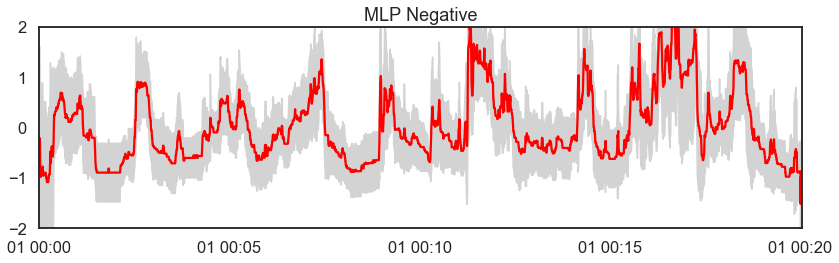

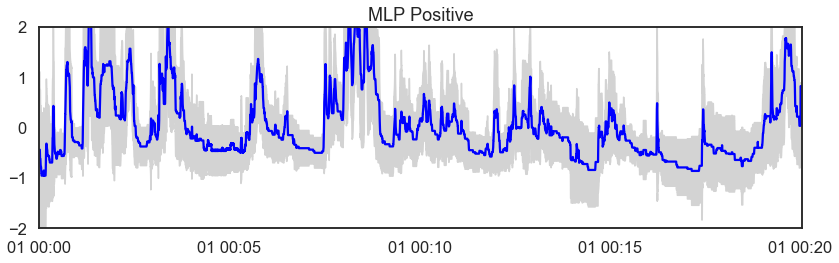

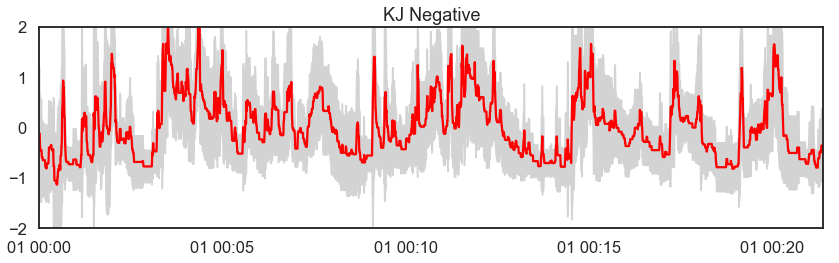

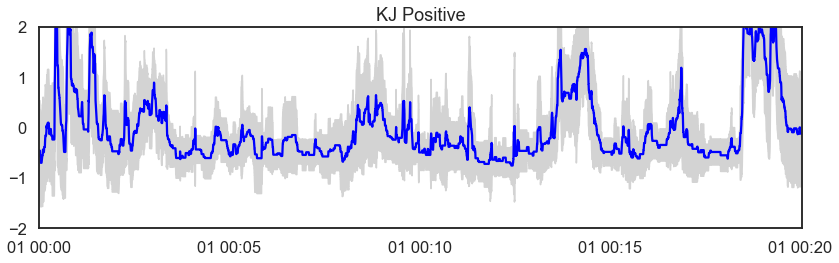

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='talk',style='white')

mean = mlpneg.mean(axis=1)
plt.figure(figsize=(12,4))
plt.fill_between(mean.index,mean-mlpneg.std(axis=1),mean+mlpneg.std(axis=1),color='lightgray')
plt.plot(mlpneg.index,mean,'k-',color='red')
plt.xlim((mlpneg.index[0],mlpneg.index[-1]))
plt.ylim((-2,2))
plt.title('MLP Negative')
plt.tight_layout()
plt.savefig('mlp_neg.png')
plt.show()
plt.close()

mean = mlppos.mean(axis=1)
plt.figure(figsize=(12,4))
plt.fill_between(mean.index,mean-mlppos.std(axis=1),mean+mlppos.std(axis=1),color='lightgray')
plt.plot(mlppos.index,mean,'k-',color='blue')
plt.xlim((mlppos.index[0],mlpneg.index[-1]))
plt.ylim((-2,2))
plt.title('MLP Positive')
plt.tight_layout()
plt.savefig('mlp_pos.png')
plt.show()
plt.close()

mean = kjneg.mean(axis=1)
plt.figure(figsize=(12,4))
plt.fill_between(mean.index,mean-kjneg.std(axis=1),mean+kjneg.std(axis=1),color='lightgray')
plt.plot(kjneg.index,mean,'k-',color='red')
plt.xlim((kjneg.index[0],kjneg.index[-1]))
plt.ylim((-2,2))
plt.title('KJ Negative')
plt.tight_layout()
plt.savefig('kj_neg.png')
plt.show()
plt.close()

mean = kjpos.mean(axis=1)
plt.figure(figsize=(12,4))
plt.fill_between(mean.index,mean-kjpos.std(axis=1),mean+kjpos.std(axis=1),color='lightgray')
plt.plot(kjpos.index,mean,'k-',color='blue')
plt.xlim((kjpos.index[0],mlpneg.index[-1]))
plt.ylim((-2,2))
plt.title('KJ Positive')
plt.tight_layout()
plt.savefig('kj_pos.png')
plt.show()
plt.close()

# Score questionnaire data

In [33]:
q_raw = pd.read_csv('/Users/catcamacho/Box/CCP/UGTV_study/DATA/questionnaires/UndergradTVStudy_DATA_2021-04-05_1442.csv',index_col=0)
panasc_items = []
for a in q_raw.columns:
    if 'panas_c' in a:
        panasc_items.append(a)
panasc_raw = q_raw[['redcap_repeat_instance'] + panasc_items]
panasc_raw = panasc_raw.dropna(axis=0)
panasc_raw

,redcap_repeat_instance,panas_c_1,panas_c_2,panas_c_3,panas_c_4,panas_c_5,panas_c_6,panas_c_7,panas_c_8,panas_c_9,...,panas_c_11,panas_c_12,panas_c_13,panas_c_14,panas_c_15,panas_c_16,panas_c_17,panas_c_18,panas_c_19,panas_c_20
record_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,4.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,4.0,...,1.0,4.0,1.0,1.0,2.0,3.0,4.0,2.0,1.0,1.0
1,2.0,4.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,3.0,1.0,2.0,1.0,2.0,4.0,1.0,1.0,1.0
1,3.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,3.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0
1,4.0,3.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,...,1.0,3.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0
1,5.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,1.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,2.0,4.0,1.0,3.0,1.0,3.0,1.0,1.0,1.0,4.0,...,1.0,4.0,1.0,3.0,1.0,4.0,4.0,1.0,3.0,1.0
14,3.0,3.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,3.0,...,1.0,4.0,1.0,3.0,1.0,3.0,4.0,1.0,3.0,1.0
14,4.0,3.0,1.0,3.0,1.0,3.0,1.0,1.0,1.0,4.0,...,1.0,4.0,1.0,3.0,1.0,3.0,4.0,2.0,3.0,1.0
